# 1. EDA

Para empezar este proyecto en el cual analizaremos la base de datos de "Internet" que nos suministro la empresa de telecomuniaciones que nos contrato para realizar un analisis que le permite ver a la empresa  distribución de sus ingresos, si en sus daos hay valores nulos, duplicados, además como el avance en la tecnologia ha hecho que las personas cambien de tecnologia de internet entre otra información

Primero importaremos la librerias que usaremos para realizar el analisis y la muestra de los datos como sera pandas, matplotlib, seaborn

In [2]:
#Importación de librerias que se usaran
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Al tener nuestras librerias cargadas mostraremos que se encuentra almacenado en las hojas de este excel, cabe resaltar que se eliminaron hojas que se observaron que tiene información rebundante al momento de realizar el analisis ya que hay hojas que tienen los mismos datos de manera mucho mas organizada y se pueden manipular mejor

In [3]:
# Carga para ver el contenido del excel y ver la lista de los nombres
file = 'Internet.xlsx'
internet = pd.ExcelFile(file)
sheet = internet.sheet_names
# print(sheet) --> no elegi este por que me gusta mas como lo muestra como lista
sheet

['Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetracion-totales',
 'Totales Accesos por velocidad',
 'Accesos por velocidad',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

Al tener y saber que columnas tenemos se realizara una extraccion a un DF con ayuda de pandas que nos ayudara a leet el archivo en especifico

In [4]:
df = pd.ExcelFile(file) # Carga el excel a un df con sus hojas

Para poder encontrar los outliers hay dos maneras de hacerlo usando el metodo del rango intercuartilico (IQR) o usando el seaborn de python que es una librerias para graficas 
el cual tiene una funcion boxplot que nos mostrara cuales son esos rangos atipicos (outliers)

In [5]:
# Se crea una funcion que tenga este rango intercuartilico
def outliers (df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    banda_inferior = Q1 - 1.5 * IQR
    banda_superior = Q3 + 1.5 * IQR
    return df[(df[column] < banda_inferior) | (df[column]>banda_superior)] 

In [6]:
# Debido a que la intension es que mire hoja por hoja hare un ciclo for 
results = {}

for sheet in df.sheet_names:
    df_copy = df.parse(sheet) 
    
    if sheet not in results:
        results[sheet] = {}
    
    outliers_info={}
    for column in df_copy.select_dtypes(include=[float, int]).columns:
        atipicos = outliers(df_copy,column) # Estamos llamando la funcion que creamos
        outliers_info[column] = len(atipicos)
        
    results[sheet]['outliers'] = outliers_info

for sheet, analisis in results.items():
    print(f"Reusltados por outliers en columna:\n {analisis['outliers']}")

Reusltados por outliers en columna:
 {'Año': 0, 'Trimestre': 0, 'Mbps (Media de bajada)': 105}
Reusltados por outliers en columna:
 {'Año': 0, 'Trimestre': 0, 'Mbps (Media de bajada)': 4}
Reusltados por outliers en columna:
 {'Año': 0, 'Trimestre': 0, 'ADSL': 0, 'Cablemodem': 0, 'Fibra óptica': 3, 'Wireless': 0, 'Otros': 0, 'Total': 0}
Reusltados por outliers en columna:
 {'Año': 0, 'Trimestre': 0, 'ADSL': 130, 'Cablemodem': 164, 'Fibra óptica': 112, 'Wireless': 84, 'Otros': 108, 'Total': 164}
Reusltados por outliers en columna:
 {'Año': 0, 'Trimestre': 0, 'Accesos por cada 100 hogares': 0, 'Accesos por cada 100 hab': 0}
Reusltados por outliers en columna:
 {'Año': 0, 'Trimestre': 0, 'Hasta 512 kbps': 7, 'Entre 512 Kbps y 1 Mbps': 2, 'Entre 1 Mbps y 6 Mbps': 0, 'Entre 6 Mbps y 10 Mbps': 4, 'Entre 10 Mbps y 20 Mbps': 7, 'Entre 20 Mbps y 30 Mbps': 2, 'Más de 30 Mbps': 0, 'OTROS': 0, 'Total': 0}
Reusltados por outliers en columna:
 {'Año': 0, 'Trimestre': 0, 'HASTA 512 kbps': 167, '+ 512 

Como se observa anteriormente no es muy estetica la información que nos manda estos outliers por esa razon se usara los boxplot llamando a cada una de las hojas y que por columna haga su debido boxplot

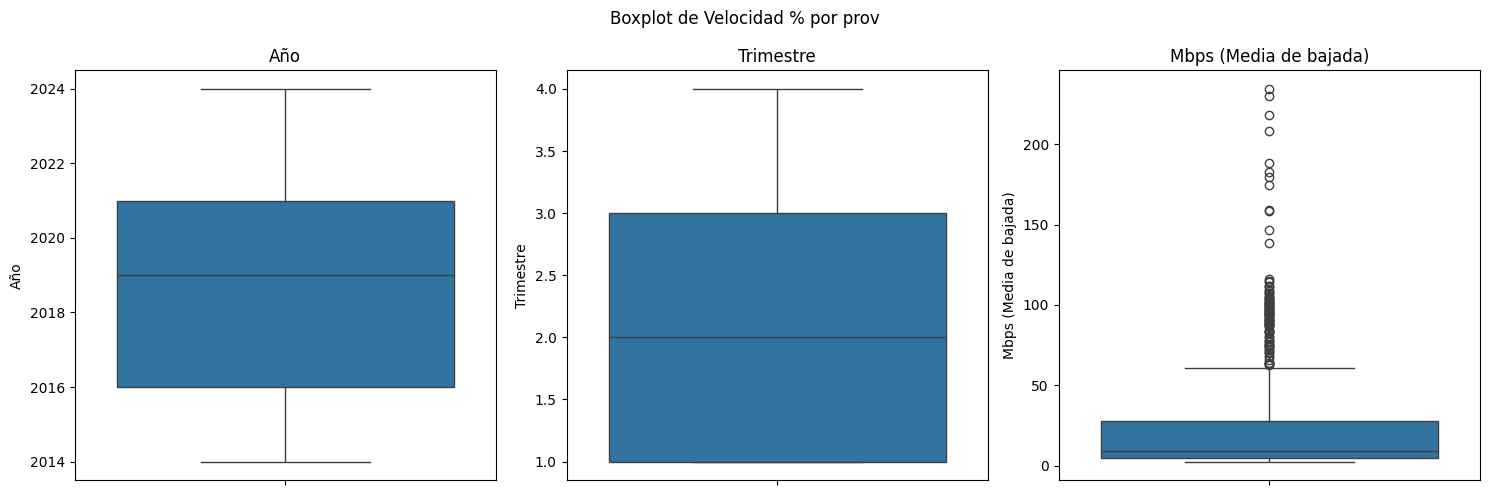

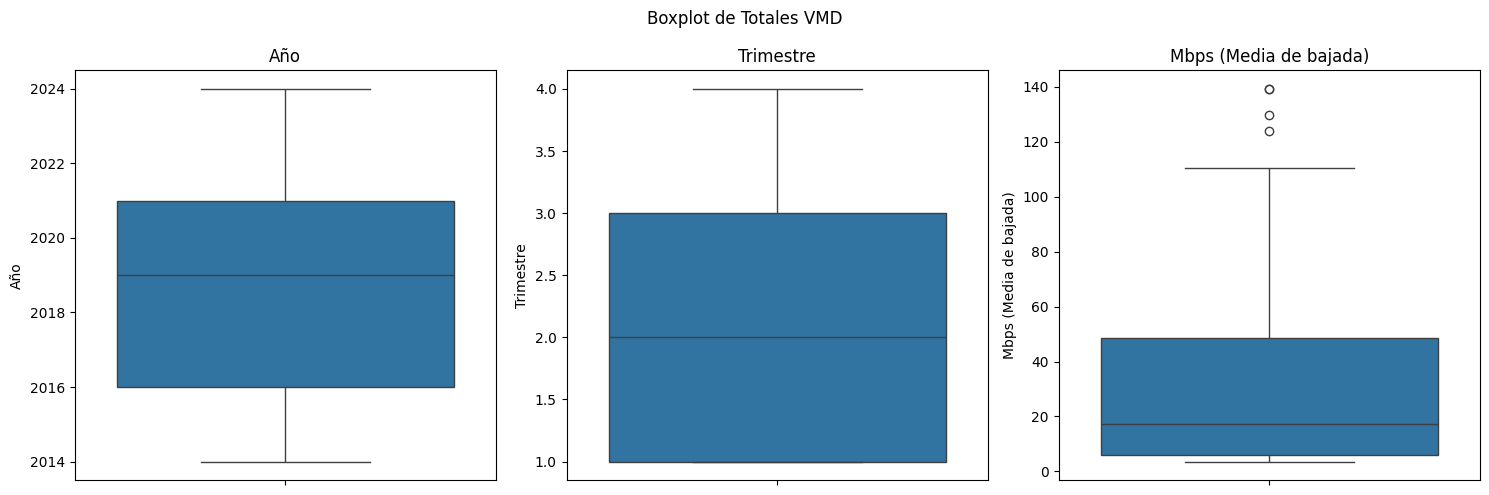

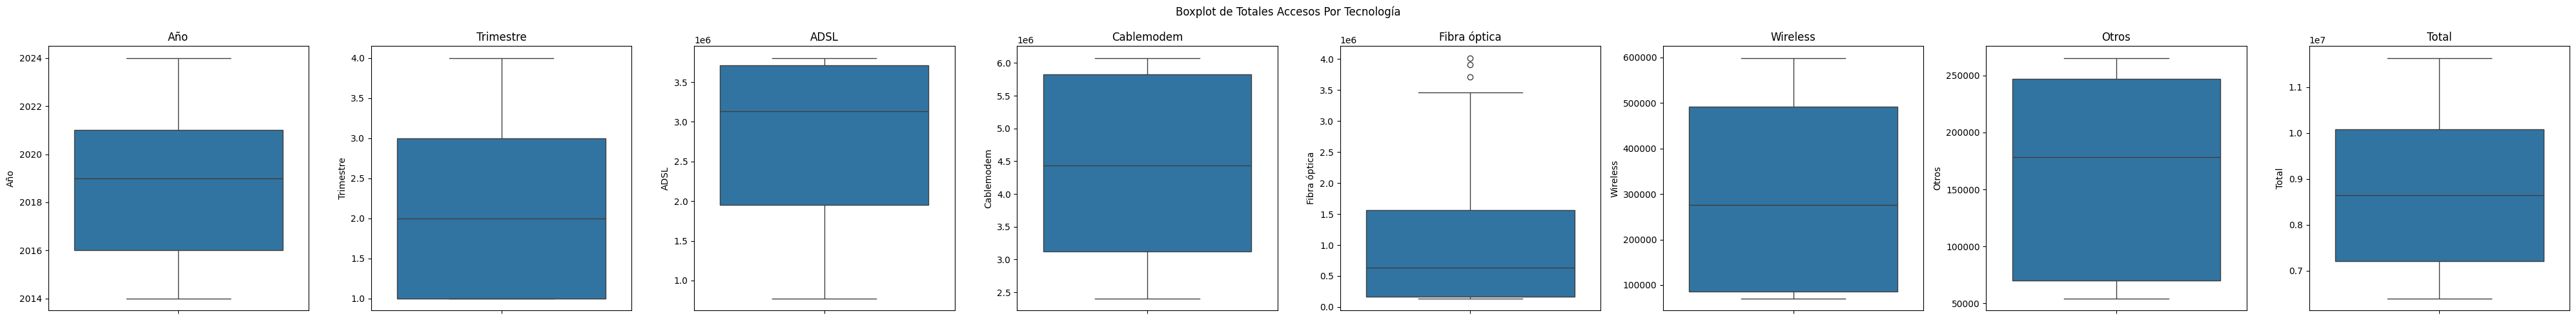

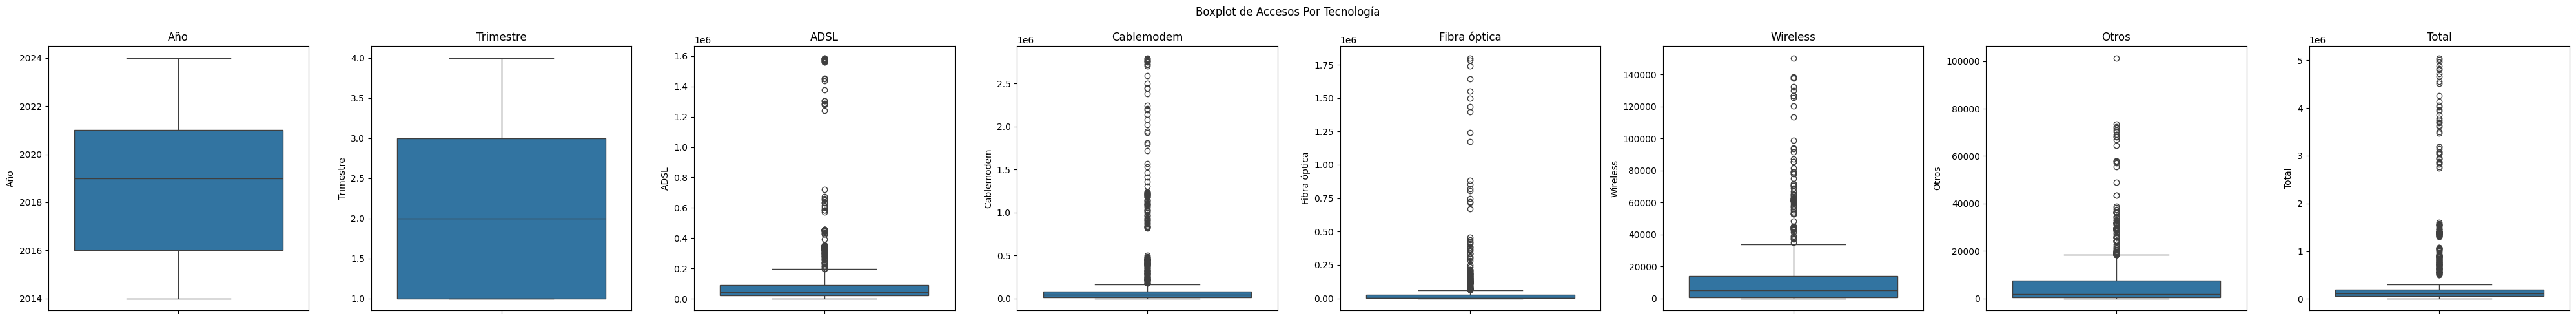

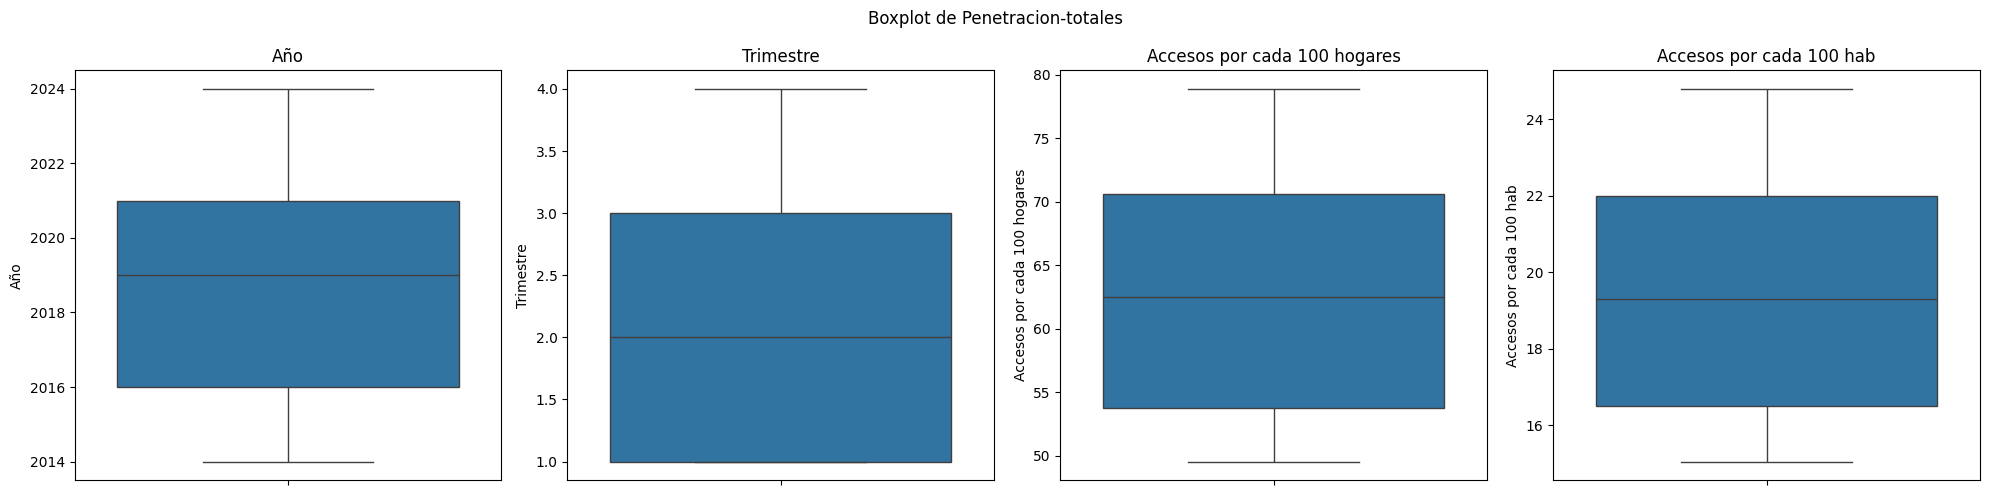

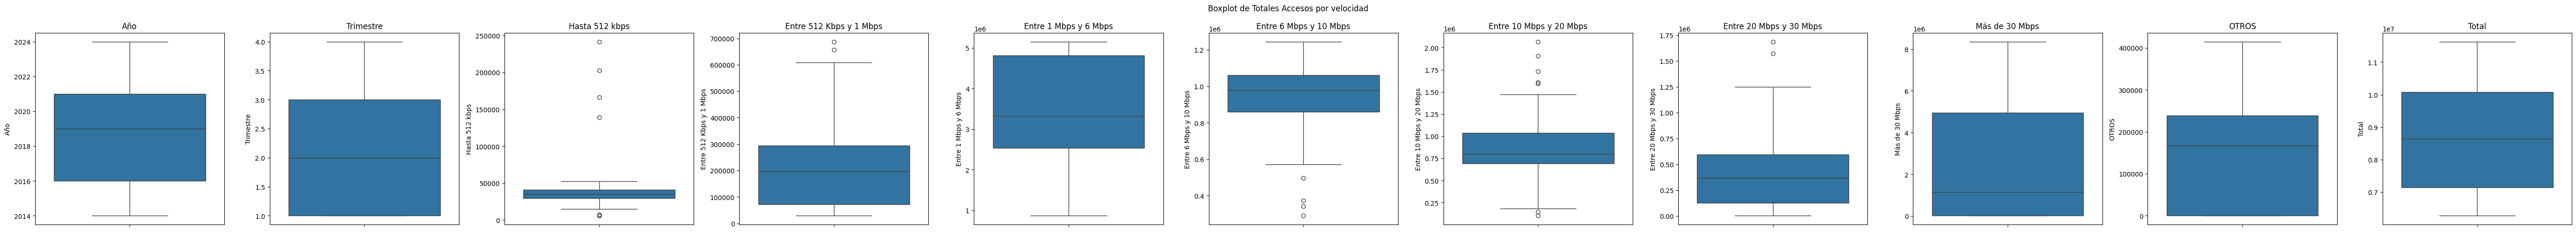

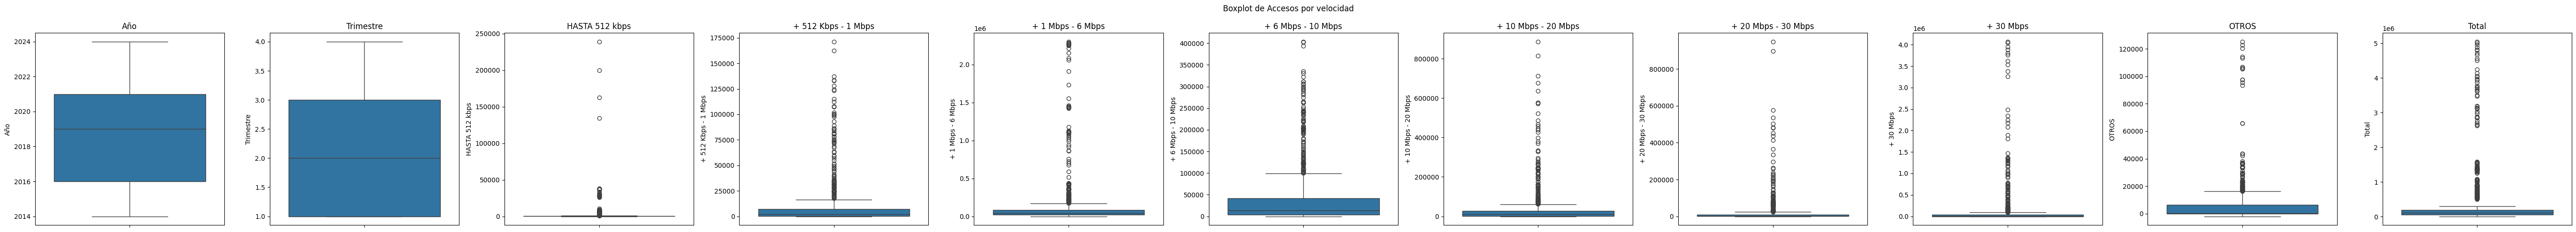

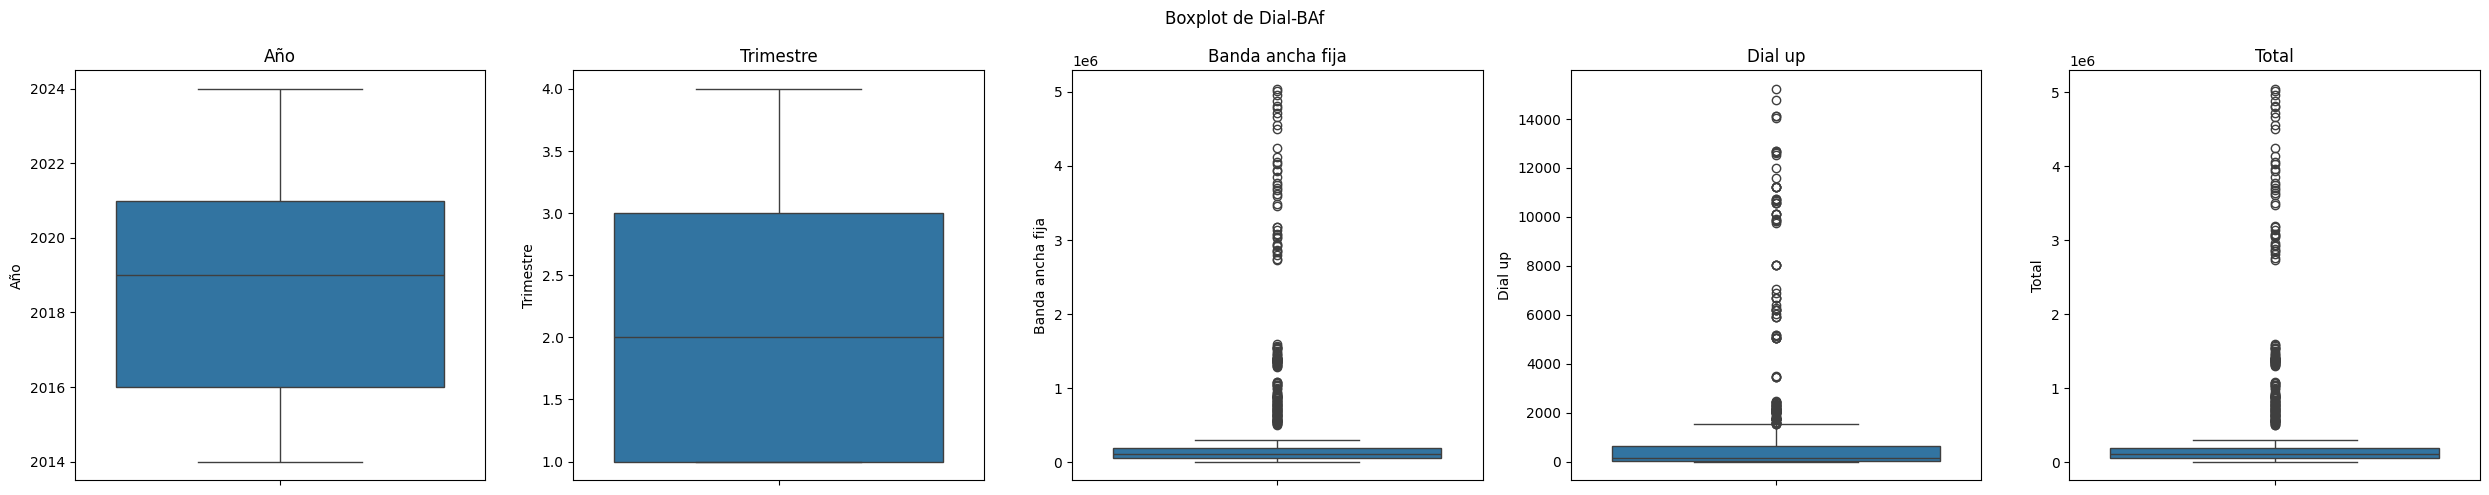

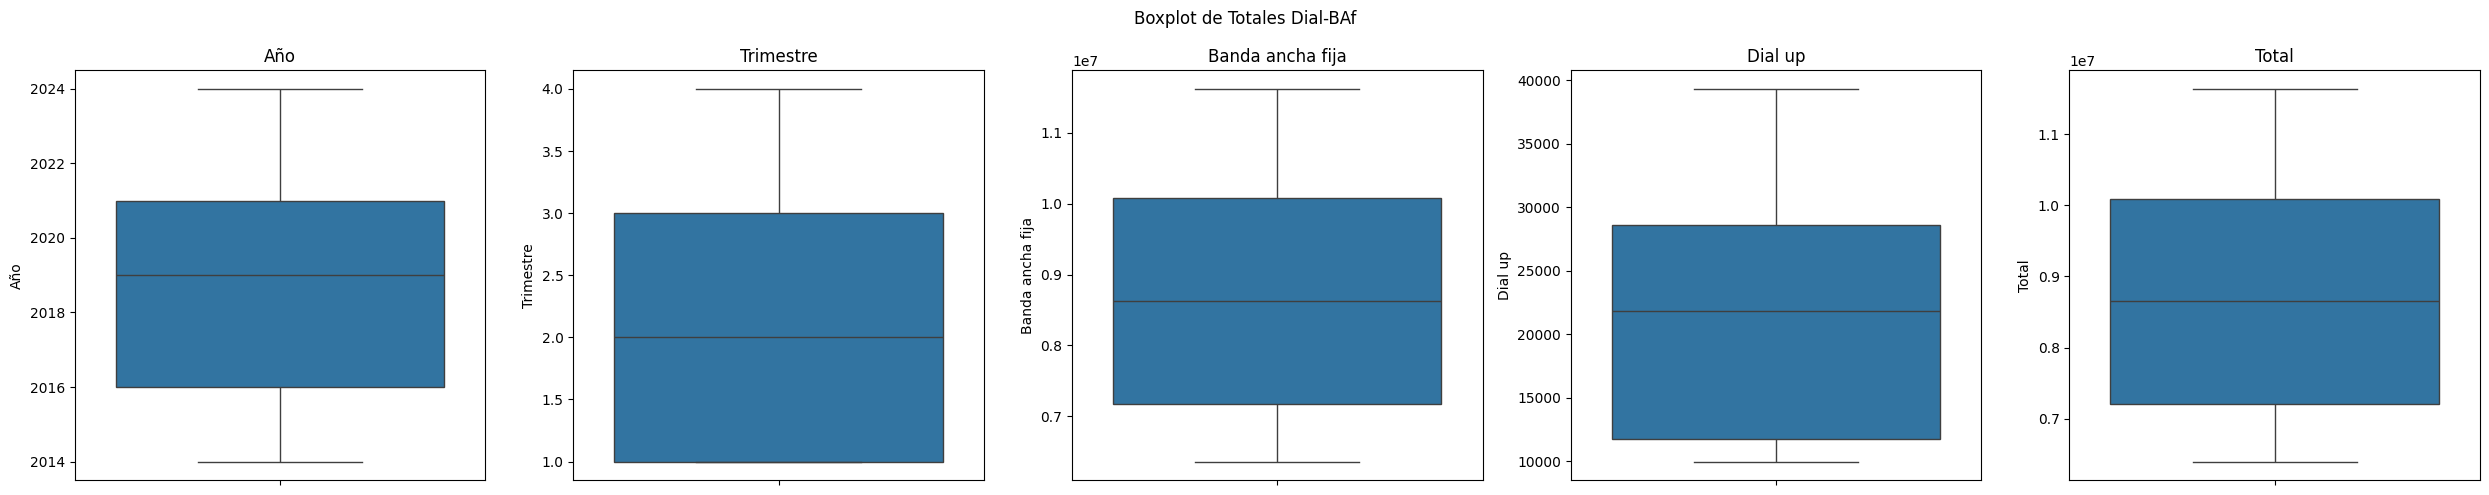

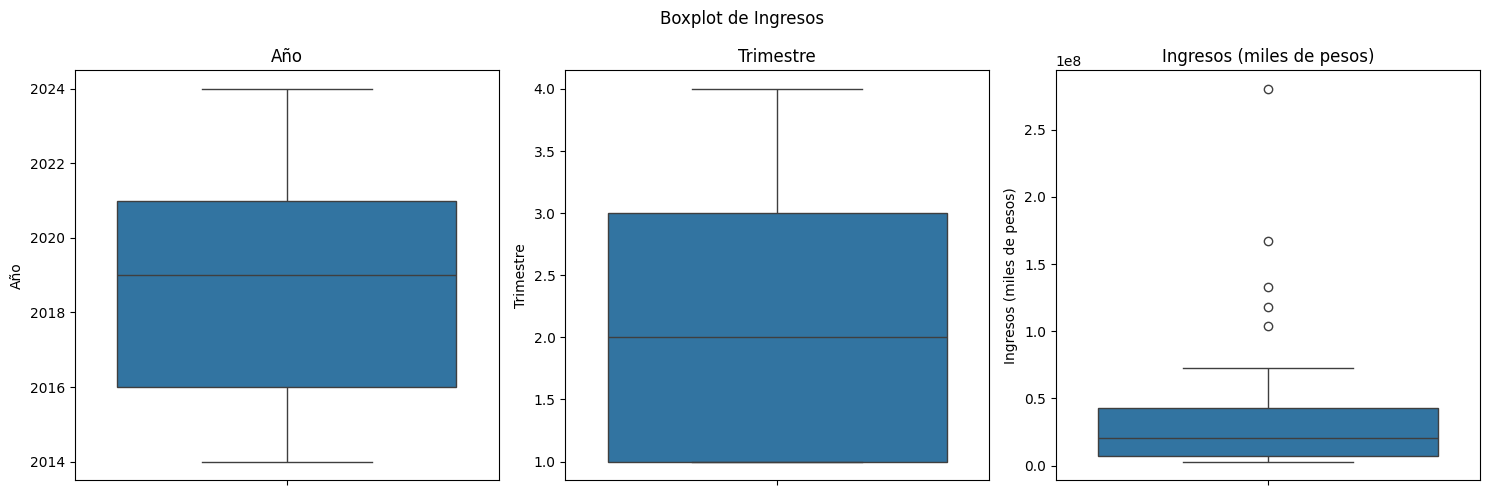

In [7]:
for sheet in df.sheet_names:
    df_copy = df.parse(sheet)
    
    n_cols = df_copy.select_dtypes(include=[float, int])
    
    if not n_cols.empty:
        # Tamaño del figure del subplot para cada columna numerica
        n_columns = len(n_cols.columns)
        fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(5* n_columns, 5))
        
        
        # Itera boxplot individual
        for ax, column in zip(axes, n_cols.columns):
            sns.boxplot(data=n_cols, y=column, ax=ax)
            ax.set_title(f"{column}")
            ax.set_label(column)
        
        
        plt.suptitle(f"Boxplot de {sheet}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"La hoja {sheet} no tiene columnas numericas")

Al saber los valores atipicos miraremos que valores faltantes o nulos hay en nuestro dataset para poder ver cuantos son esos valores que haran falta y ver si es posible poder complementarlos sea ya usando con imputacion de media,moda y mediana o hacer una imputación con algo mas avanzado ejemplo KNN, Kmeans, entre otras

Cabe aclarar que como el ExcelFile es representacion del archivo excel nos ayudamos con la función sheet_names ademas como hicimos en el anterior analisis con ayuda de un ciclo en este caso otra vez nos ayduaremos para hacer un ciclo for

In [8]:
for sheet in df.sheet_names:
    
    if not df_copy.empty:
        print(f'Analisis de la hoja {sheet}')
        
        missing = df_copy.isnull().sum()
        print('Valores nulos por columna: ')
        print(missing)

Analisis de la hoja Velocidad % por prov
Valores nulos por columna: 
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
Analisis de la hoja Totales VMD
Valores nulos por columna: 
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
Analisis de la hoja Totales Accesos Por Tecnología
Valores nulos por columna: 
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
Analisis de la hoja Accesos Por Tecnología
Valores nulos por columna: 
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
Analisis de la hoja Penetracion-totales
Valores nulos por columna: 
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo     

Se observa en el analisis es que no hay valores nulos en los datos que quedaron al realizar la limpieza de las hojas que usaremos.

Por ende no debemos realizar imputación de datos para completar valores restantes de nuestro dataset

Ahora descartaremos que no hayan datos duplicados  en las hojas del dataset

In [9]:
for sheet in df.sheet_names:
    
    if not df_copy.empty:
        print(f'Analisis de la hoja {sheet}')
        
        duplicados = df_copy.duplicated().sum()
        print('Valores duplicados por columna: ')
        print(duplicados)

Analisis de la hoja Velocidad % por prov
Valores duplicados por columna: 
0
Analisis de la hoja Totales VMD
Valores duplicados por columna: 
0
Analisis de la hoja Totales Accesos Por Tecnología
Valores duplicados por columna: 
0
Analisis de la hoja Accesos Por Tecnología
Valores duplicados por columna: 
0
Analisis de la hoja Penetracion-totales
Valores duplicados por columna: 
0
Analisis de la hoja Totales Accesos por velocidad
Valores duplicados por columna: 
0
Analisis de la hoja Accesos por velocidad
Valores duplicados por columna: 
0
Analisis de la hoja Dial-BAf
Valores duplicados por columna: 
0
Analisis de la hoja Totales Dial-BAf
Valores duplicados por columna: 
0
Analisis de la hoja Ingresos 
Valores duplicados por columna: 
0


Como se observa vemos que no hay valores duplicados por ende no tenemos que eliminar valores duplicados de nuestra data

Por otro lado veremos algunas graficas de barras de los diferentes trimestres del año en como han aumentado los precios, cantidad hasta de ingresos en los 10 ultimos años y se mirara el primer y cuarto trimestre de cada año y de lo que va del 2024

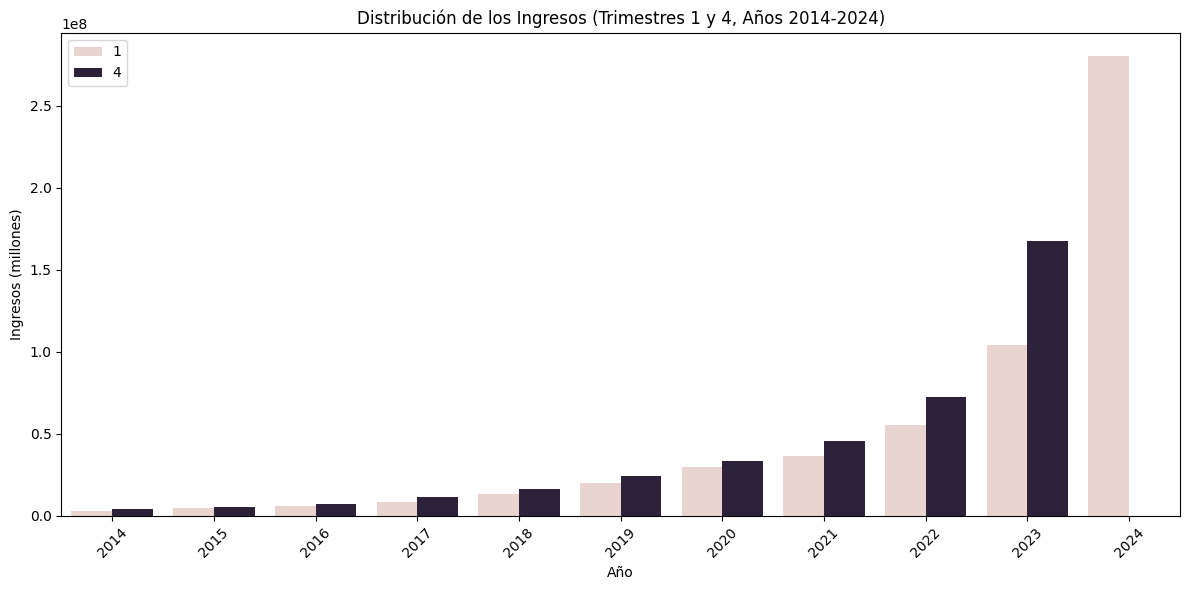

In [10]:
df_ingreso = df.parse('Ingresos ')

filtro = df_ingreso[(df_ingreso['Trimestre'].isin([1,4])) & (df_ingreso['Año'].between(2014, 2024))]

plt.figure(figsize=(12, 6))
sns.barplot(x='Año', y='Ingresos (miles de pesos)', hue='Trimestre', data=filtro)
plt.title('Distribución de los Ingresos (Trimestres 1 y 4, Años 2014-2024)')
plt.xlabel('Año')
plt.ylabel('Ingresos (millones)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

En el grafico anterior podemos ver los diferentes años como se ve el aumento de los ingresos de la empresa desde el primer semetre (Enero-Marzo) en comparación al ultimo semestre (Octubre-Diciembre), además observamos los cambios que ocurren de manera ascendente y descomunal de los diferentes años 

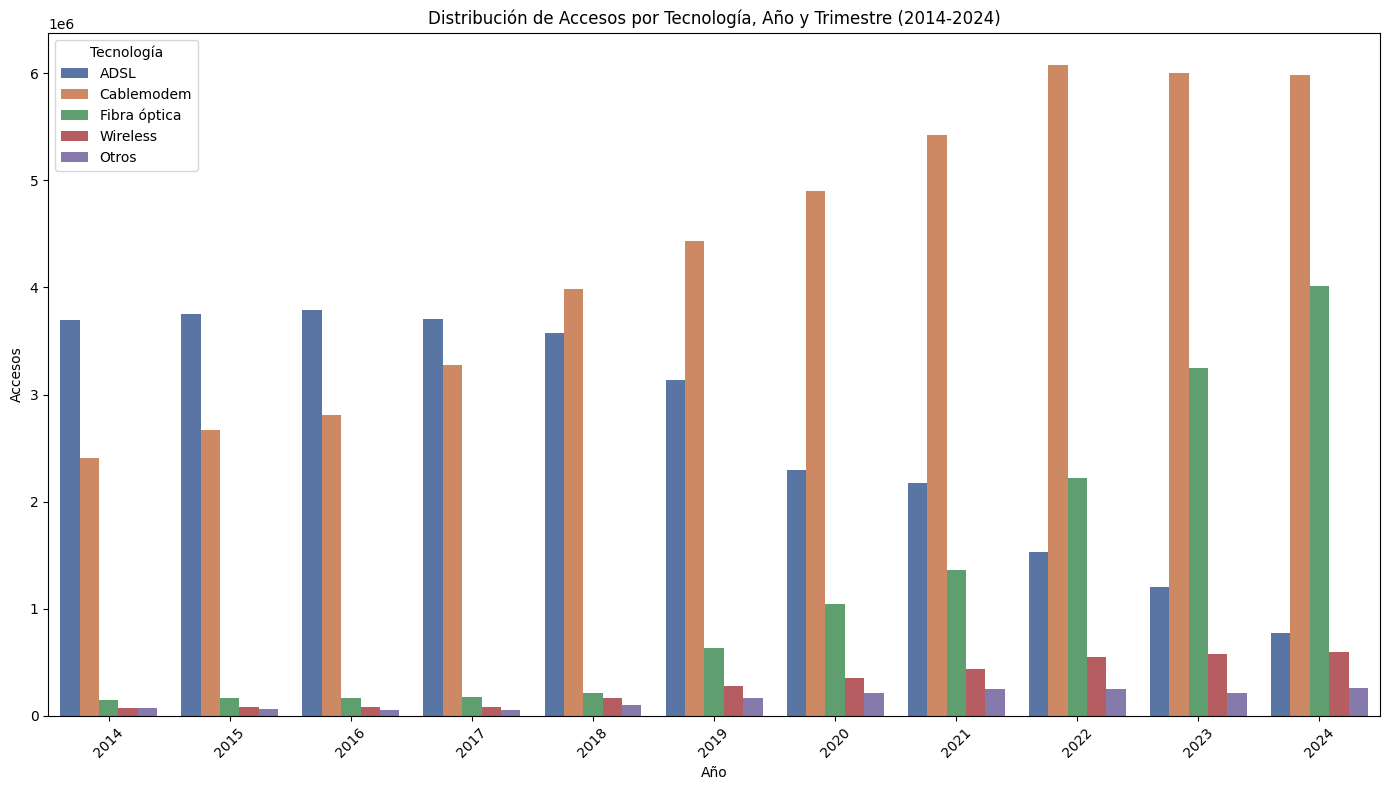

In [20]:
df_tecnologia = df.parse('Totales Accesos Por Tecnología')

filtro = df_tecnologia[(df_tecnologia['Trimestre'].isin([1])) & (df_tecnologia['Año'].between(2014, 2024))]

df_melt = filtro.melt(id_vars=['Año', 'Trimestre'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], 
                    var_name='Tecnología', value_name='Accesos')

plt.figure(figsize=(14, 8))
sns.barplot(x='Año', y='Accesos', hue='Tecnología', data=df_melt, palette='deep', errorbar=None)
plt.title('Distribución de Accesos por Tecnología, Año y Trimestre (2014-2024)')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.xticks(rotation=45)
plt.legend(title='Tecnología')

plt.tight_layout()
plt.show()

Podemos observar que a medida que va pasando el tiempo la tendencia que ha cogido el cable modem y la fibra optica en el paso de los tiempo ya que son las que mayor velocidad tiene ya que dan amyor capacidad de subida y de bajada, en este caso solo nos fijamos en el primer trimestre de cada año

Por otro lado se evalua la velocidad del internet el como ha ido cambiando a travez de los años

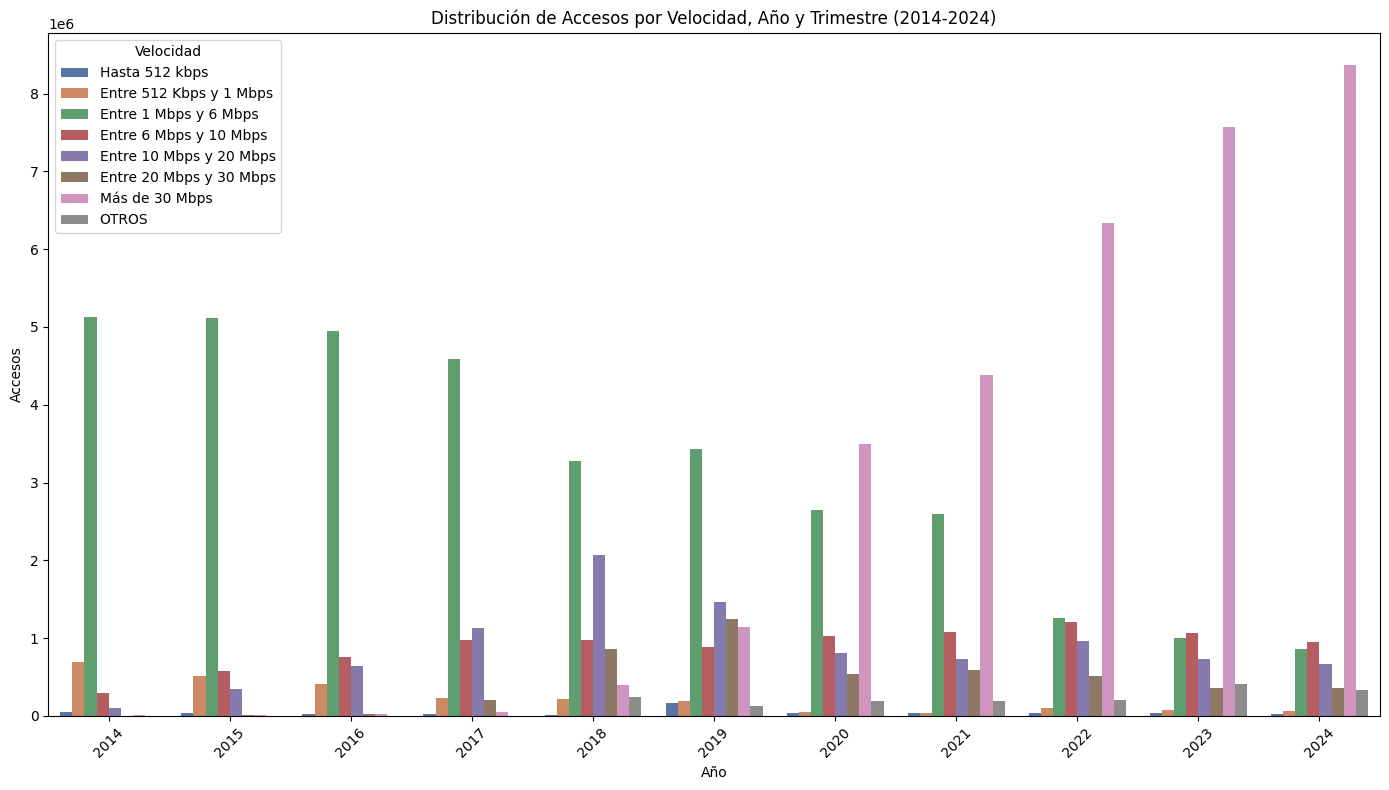

In [21]:
df_velocidad = df.parse('Totales Accesos por velocidad')

filtro = df_velocidad[(df_velocidad['Trimestre'].isin([1])) & (df_velocidad['Año'].between(2014, 2024))]

df_melt = filtro.melt(id_vars=['Año', 'Trimestre'], value_vars=['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS'], 
                    var_name='Velocidad', value_name='Accesos')

plt.figure(figsize=(14, 8))
sns.barplot(x='Año', y='Accesos', hue='Velocidad', data=df_melt, palette='deep', errorbar=None)
plt.title('Distribución de Accesos por Velocidad, Año y Trimestre (2014-2024)')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.xticks(rotation=45)
plt.legend(title='Velocidad')

plt.tight_layout()
plt.show()

Se puede observar en la grafica que se hace basada en el primer trimestre del año se observa como antes el internet en temas de velocidad era bajo de 512 Kbps y eso era por que antes los archivos no eran tan pesados para su subida y de bajada, además de que la tecnologia antes no estaba todo conectado al internet.

Por otro lado podemos observar que a partir del 2019-2020 (Epoca pandemia COVID) se empieza a haber un aumento de mas de 30 Mbps y eso es ya por que la infromación que se envia por medio de internet se volvio mas grande como reuniones virtuales, archivos y de que ahora todo depende del internet que todo esta conectado entre si y eso requiere una gran ayuda en su velocidad de información

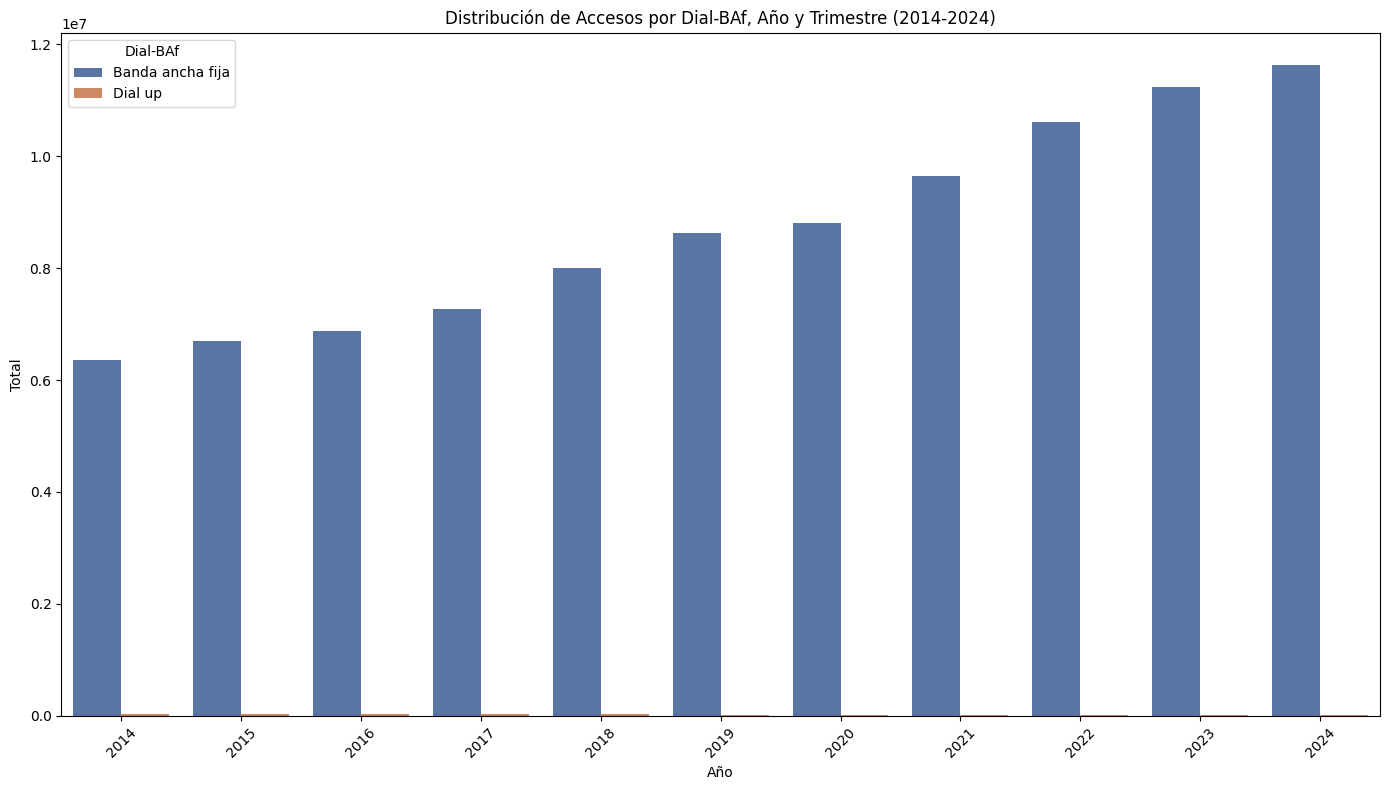

In [22]:
df_dial = df.parse('Totales Dial-BAf')

filtro = df_dial[(df_dial['Trimestre'].isin([1])) & (df_dial['Año'].between(2014, 2024))]

df_melt = filtro.melt(id_vars=['Año', 'Trimestre'], value_vars=['Banda ancha fija', 'Dial up'], 
                    var_name='Dial', value_name='Acceso')

plt.figure(figsize=(14, 8))
sns.barplot(x='Año', y='Acceso', hue='Dial', data=df_melt, palette='deep', errorbar=None)
plt.title('Distribución de Accesos por Dial-BAf, Año y Trimestre (2014-2024)')
plt.xlabel('Año')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(title='Dial-BAf')

plt.tight_layout()
plt.show()

Al obtener la mayor información de el dataset de internet, realizaremos una comparación entre los diferentes servicios de hogas como son la televisión y telefonia fija para poder observar cual es el que genera mayor rentabilidad para esto.

In [14]:
telefonia = pd.ExcelFile('telefonia_fija.xlsx')
tv = pd.ExcelFile('Television.xlsx')

In [15]:
df_ingresos_fija = telefonia.parse('Fija_ingresos')
df_ingreso_tv = tv.parse('Ingresos_TV')

In [16]:
# vamos a cambiar el nombre de una de las columnas para que queden iguales al momento de comparar los ingreso
df_ingreso_tv = df_ingreso_tv.rename(columns={'Ingresos TV por suscripción  (miles de $)': 'Ingresos (miles de $)'})
df_ingreso = df_ingreso.rename(columns={'Ingresos (miles de pesos)': 'Ingresos (miles de $)'})

In [17]:
# Agregaremos una nueva lsita para poder diferenciar los servicios antes de concatenar los datos

df_ingresos_fija['Servicio'] = 'Telefonía Fija'
df_ingreso_tv['Servicio'] = 'TV'
df_ingreso['Servicio'] = 'Internet'

df_ingresos_total = pd.concat([df_ingresos_fija, df_ingreso_tv, df_ingreso])

In [18]:
filtro1= df_ingresos_total[df_ingresos_total['Trimestre'] == 1]

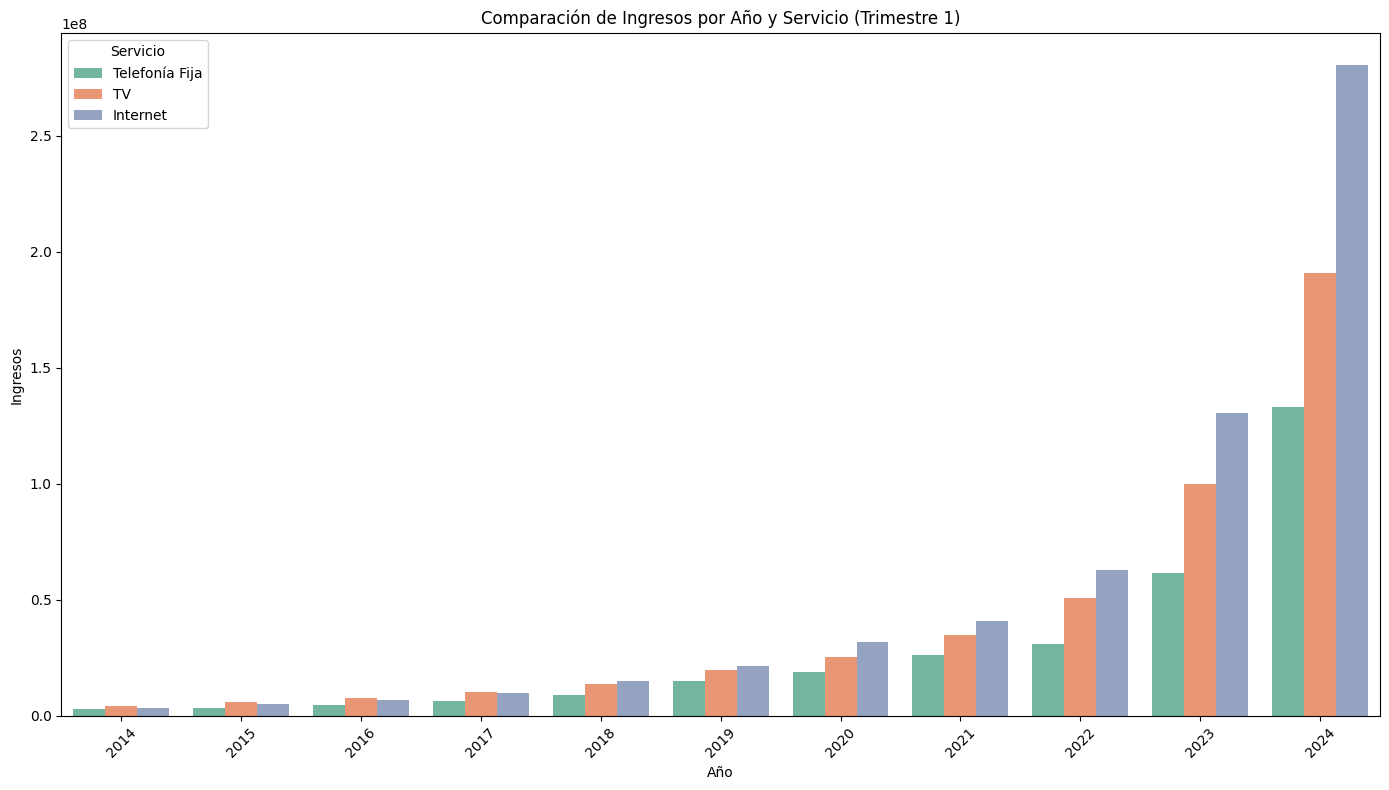

In [19]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Año', y='Ingresos (miles de $)', hue='Servicio', data=df_ingresos_total, palette='Set2', errorbar=None)
plt.title('Comparación de Ingresos por Año y Servicio (Trimestre 1)')
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.legend(title='Servicio')
plt.tight_layout()
plt.show()

# 2. KPI

Por este lado empezaremos a hacer los KPIs los cuales son indicadores de rendimiento que se usaran para poder medir el exito de una actividad o servicio de una organización en este caso lo usaremos para mirar el rendimiento del internet en diferentes casos

Para empezar realizaremos el primer KPI que se propone el cual es el aumento del 2% del acceso en el proximo trimestre 

In [33]:
proyectado = 0.02

df_penetracion = internet.parse('Penetracion-totales')

df_penetracion['Nuevo_Acceso'] = df_penetracion['Accesos por cada 100 hogares'] * (1+ proyectado)

df_penetracion['KPI_Proximo_Trimestre'] = ((df_penetracion['Nuevo_Acceso'] - df_penetracion['Accesos por cada 100 hogares']) / df_penetracion['Accesos por cada 100 hogares']) * 100

#Elegimos los datos que necesitamos

df_penetracion[['Año', 'Trimestre', 'Accesos por cada 100 hogares', 'Nuevo_Acceso', 'KPI_Proximo_Trimestre']].head()

,Año,Trimestre,Accesos por cada 100 hogares,Nuevo_Acceso,KPI_Proximo_Trimestre
0,2024,1,78.89,80.4678,2.0
1,2023,4,78.56,80.1312,2.0
2,2023,3,77.84,79.3968,2.0
3,2023,2,77.02,78.5604,2.0
4,2023,1,77.20,78.7440,2.0


C:\Users\santi\AppData\Local\Temp\ipykernel_8304\3511577033.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Año', y='Accesos', hue='Tipo', data=df_comparacion_melt, ci=None, palette='Blues_d')


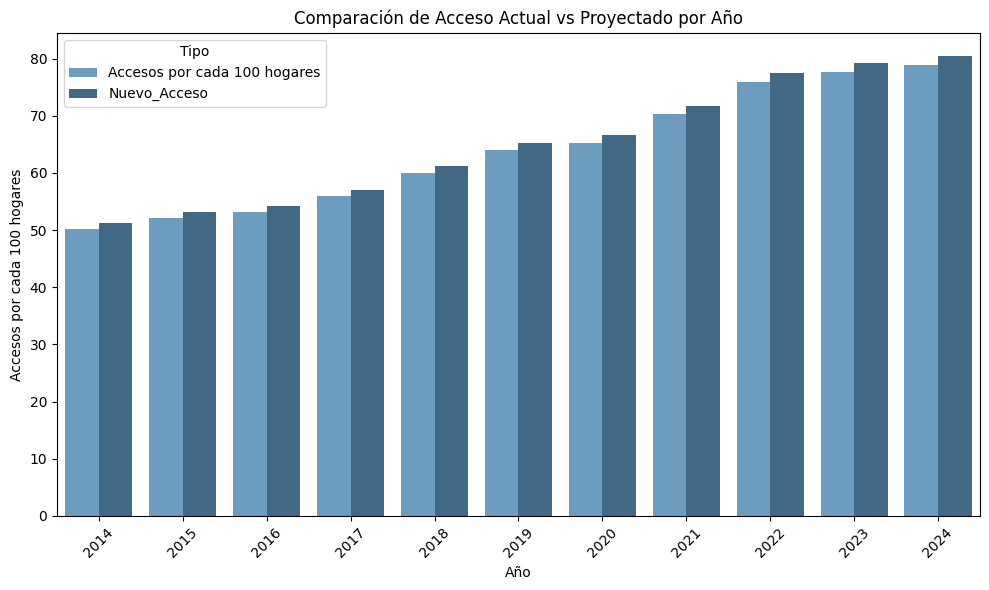

In [41]:
# Visualización en un grafico de linea

plt.figure(figsize=(10, 6))
df_comparacion = df_penetracion[['Año', 'Trimestre', 'Accesos por cada 100 hogares', 'Nuevo_Acceso']].copy()
df_comparacion_melt = df_comparacion.melt(id_vars=['Año', 'Trimestre'], value_vars=['Accesos por cada 100 hogares', 'Nuevo_Acceso'], 
                                        var_name='Tipo', value_name='Accesos')


sns.barplot(x='Año', y='Accesos', hue='Tipo', data=df_comparacion_melt, ci=None, palette='Blues_d')
plt.title('Comparación de Acceso Actual vs Proyectado por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ahora realizaremos dos KPI de mas en el cual analizaremos diferentes parametros

Para empezar tenemos el primer KPI propuesto sera analizar el cambio en la proporción de accesos a internet entre las diferentes tecnologias, la intención de esto es establecer el objetivo de las transiciones tecnologicas para que sean mas modernas y rapidas

In [34]:
sheet_name = 'Totales Accesos Por Tecnología'
data_tecnologia = pd.read_excel('Internet.xlsx', sheet_name=sheet_name)
data_tecnologia.sort_values(by=['Año', 'Trimestre'], inplace=True)

In [35]:
# Creamos nuevas columnas para ver el crecimiento de cada tecnologia trimestralmente
data_tecnologia['Crecimiento ADSL (%)'] = data_tecnologia['ADSL'].pct_change() * 100
data_tecnologia['Crecimiento Cablemodem (%)'] = data_tecnologia['Cablemodem'].pct_change() * 100
data_tecnologia['Crecimiento Fibra óptica (%)'] = data_tecnologia['Fibra óptica'].pct_change() * 100
data_tecnologia['Crecimiento Wireless (%)'] = data_tecnologia['Wireless'].pct_change() * 100
data_tecnologia['Crecimiento Otros (%)'] = data_tecnologia['Otros'].pct_change() * 100
data_tecnologia['Crecimiento Total (%)'] = data_tecnologia['Total'].pct_change() * 100

data_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo,Crecimiento ADSL (%),Crecimiento Cablemodem (%),Crecimiento Fibra óptica (%),Crecimiento Wireless (%),Crecimiento Otros (%),Crecimiento Total (%)
40,2014,1,3697066,2407330,150323,70749,72930,6398398,Ene-Mar 2014,NaN,NaN,NaN,NaN,NaN,NaN
39,2014,2,3708882,2461670,149363,72405,72148,6464468,Abr-Jun 2014,0.319605,2.257273,-0.638625,2.340669,-1.072261,1.032602
38,2014,3,3714764,2569868,155494,85096,70049,6595271,Jul-Sept 2014,0.158592,4.395309,4.104765,17.527795,-2.909298,2.023415
37,2014,4,3764038,2536219,149682,76984,71573,6598496,Oct-Dic 2014,1.326437,-1.309367,-3.737765,-9.532763,2.175620,0.048899
36,2015,1,3756153,2668248,168188,79098,66045,6737732,Ene-Mar 2015,-0.209482,5.205741,12.363544,2.746025,-7.723583,2.110117


In [36]:
categories = [
    'Crecimiento ADSL (%)',
    'Crecimiento Cablemodem (%)',
    'Crecimiento Fibra óptica (%)',
    'Crecimiento Wireless (%)',
    'Crecimiento Otros (%)',
    'Crecimiento Total (%)'
]
data_filtered = data_tecnologia.dropna()

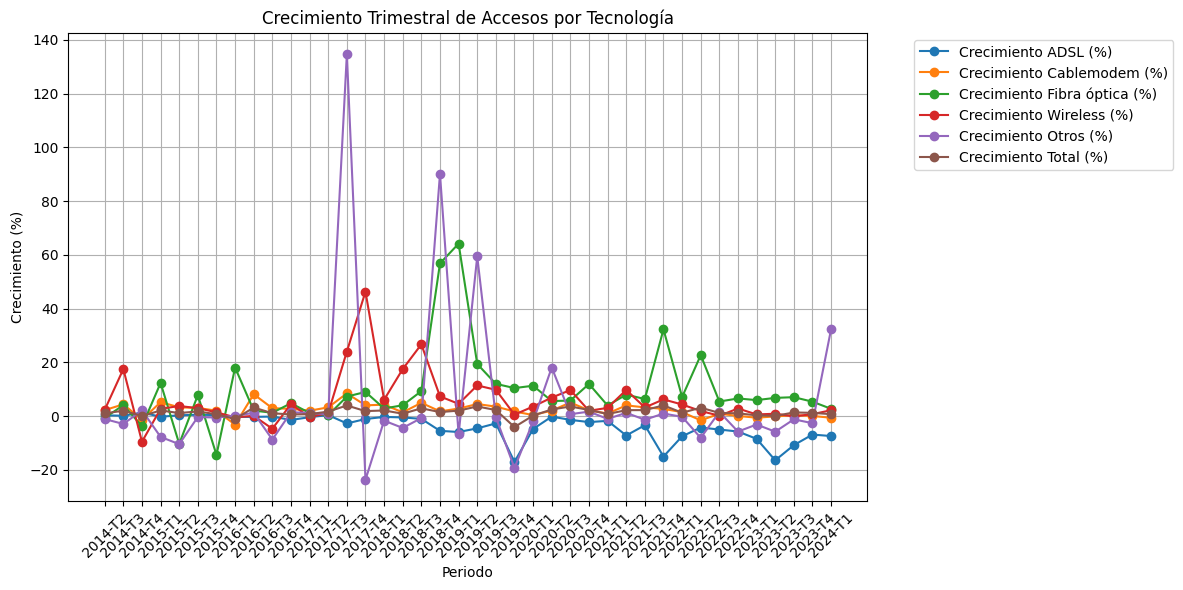

In [40]:
data_tecnologia[categories] = data_tecnologia[categories].clip(lower=-100, upper=80)
plt.figure(figsize=(12, 6))

for category in categories:
    plt.plot(data_filtered['Año'].astype(str) + "-T" + data_filtered['Trimestre'].astype(str), 
            data_filtered[category], 
            marker='o', 
            label=category)


plt.title('Crecimiento Trimestral de Accesos por Tecnología')
plt.xlabel('Periodo')
plt.ylabel('Crecimiento (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Viendo los diferentes años con sus respecitvos trimetres de cada uno se observa como varia el crecimiento de algunas tecnologias las cuales segun la información subministrada se ve como en el año 2017 hay un gran crecimiento en las tecnologia que abarca la información de otros pero al mismo tiempo en el año 2019 se observa como empieza a tomar fuerza lo que hoy es una tecnologia que aumenta la velocidad del internet que es la fibra optica

Por otro lado en el 2do KPI analizaremos el aumento del 10% de velocidad del internet en el pais trimestralmente

In [20]:
data =  internet.parse('Totales Accesos por velocidad')

data.sort_values(by=['Año', 'Trimestre'], inplace=True)

In [21]:
data['Crecimiento Hasta 512 kbps (%)'] = data['Hasta 512 kbps'].pct_change() * 100
data['Crecimiento Entre 512 Kbps y 1 Mbps (%)'] = data['Entre 512 Kbps y 1 Mbps'].pct_change() * 100
data['Crecimiento Entre 1 Mbps y 6 Mbps (%)'] = data['Entre 1 Mbps y 6 Mbps'].pct_change() * 100
data['Crecimiento Entre 6 Mbps y 10 Mbps (%)'] = data['Entre 6 Mbps y 10 Mbps'].pct_change() * 100
data['Crecimiento Entre 10 Mbps y 20 Mbps (%)'] = data['Entre 10 Mbps y 20 Mbps'].pct_change() * 100
data['Crecimiento Entre 20 Mbps y 30 Mbps (%)'] = data['Entre 20 Mbps y 30 Mbps'].pct_change() * 100
data['Crecimiento Más de 30 Mbps (%)'] = data['Más de 30 Mbps'].pct_change() * 100
data['Crecimiento Total (%)'] = data['Total'].pct_change() * 100



# Display the DataFrame with the new columns showing growth rates
data.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Crecimiento Hasta 512 kbps (%),Crecimiento Entre 512 Kbps y 1 Mbps (%),Crecimiento Entre 1 Mbps y 6 Mbps (%),Crecimiento Entre 6 Mbps y 10 Mbps (%),Crecimiento Entre 10 Mbps y 20 Mbps (%),Crecimiento Entre 20 Mbps y 30 Mbps (%),Crecimiento Más de 30 Mbps (%),Crecimiento Total (%)
40,2014,1,52684,687619,5130294,289182,101127,345,11595,0,6272846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2014,2,41064,656408,5149574,341689,147273,478,12259,0,6348745,-22.056032,-4.538996,0.375807,18.157078,45.631730,38.550725,5.726606,1.209961
38,2014,3,37430,608018,5153437,373372,182483,507,12424,0,6367671,-8.849601,-7.371939,0.075016,9.272467,23.907980,6.066946,1.345950,0.298106
37,2014,4,44075,554749,5084556,496251,276254,4371,15229,0,6475485,17.753139,-8.761089,-1.336603,32.910609,51.386157,762.130178,22.577270,1.693147
36,2015,1,41158,516919,5121423,571620,348102,7643,16347,0,6623212,-6.618264,-6.819300,0.725078,15.187677,26.007949,74.857012,7.341257,2.281327


In [22]:
categories = [
    'Crecimiento Hasta 512 kbps (%)',
    'Crecimiento Entre 512 Kbps y 1 Mbps (%)',
    'Crecimiento Entre 1 Mbps y 6 Mbps (%)',
    'Crecimiento Entre 6 Mbps y 10 Mbps (%)',
    'Crecimiento Entre 10 Mbps y 20 Mbps (%)',
    'Crecimiento Entre 20 Mbps y 30 Mbps (%)',
    'Crecimiento Más de 30 Mbps (%)',
    'Crecimiento Total (%)'
]

data_filtered = data.dropna()

C:\Users\santi\AppData\Local\Temp\ipykernel_19248\753287025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[categories] = data_filtered[categories].clip(lower=-100, upper=100) # Filtra las categorias de 100 hasta -100


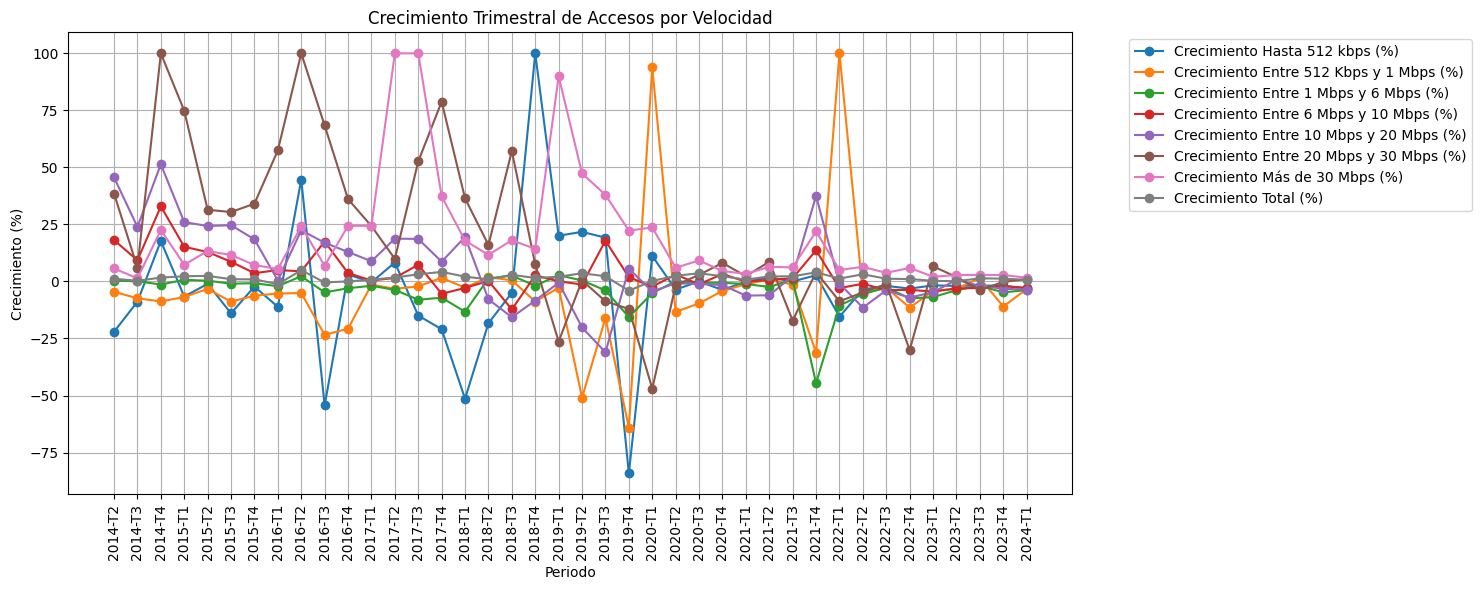

In [23]:
data_filtered[categories] = data_filtered[categories].clip(lower=-100, upper=100) # Filtra las categorias de 100 hasta -100
plt.figure(figsize=(15, 6))

for category in categories:
    plt.plot(data_filtered['Año'].astype(str) + "-T" + data_filtered['Trimestre'].astype(str), data_filtered[category], marker='o', label=category)

plt.title('Crecimiento Trimestral de Accesos por Velocidad')
plt.xlabel('Periodo')
plt.ylabel('Crecimiento (%)')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

Como se observa en la grafica se observa que en cada linea presenta un crecimiento y decremento de cada trimestre del año en el cual se observa un decremento bastante algo en el año 2019 del casi -75%